https://github.com/KacperBudnik/AiSD/tree/main/List%205

# Zadanie 1

In [1]:
import numpy as np
from scipy import linalg
from scipy.optimize import curve_fit as fit
import timeit
import random
import matplotlib.pyplot as plt
import time
from computational_complexity import n

In [2]:
a = np.array([[3,2,0],[1,-1,0],[0,5,1]])

In [3]:
b = np.array([2, 4, -1])

In [4]:
x = linalg.solve(a,b)

In [5]:
x

array([ 2., -2.,  9.])

In [6]:
np.dot(a,x) == b

array([ True,  True,  True])

In [7]:
def solve_n_time(n,a=-128,b=128,times=1):
    x=np.random.randint(a,b+1,n)
    A=np.random.randint(a,b+1,(n,n))
    b=[sum(x[i]*a[i] for i in range(n)) for a in A]
    
    return timeit.timeit("linalg.solve(A,b)","from scipy import linalg",number=times,globals=locals())

In [ ]:
for tim in [1, 2, 5, 10, 50, 100]:
    times=np.zeros(15)
    name="Czasy/"+str(tim)+"_prob.txt"
    for i in range(15):
        times[i]=solve_n_time(2**i,times=tim)
    times_log=[np.log2(k) for k in times]
    
    f = open(name, "w")
    f.write("Liczba prób\tCzas\tLogarytm Czasu\n")
    for i in range(15):
        f.write("2^"+str(i)+"\t\t"+str(times[i])+"\t"+str(times_log[i])+"\n")
    f.close()

In [8]:
f=open("Czasy/last_prob.txt","r") # Wczytanie poprzednych wyników

In [9]:
times=np.zeros(15)

In [10]:
for i in range(15):
    times[i]=float(f.readline())

In [11]:
times=[i/100 for i in times] # Bo w pliku są czasy 100 prób

In [ ]:
for i in range(15): # Tworzenie tabelki
    print("|$2^{}"+str(i)+"}$|"+str(times[i])+"|"+str(np.log2(times[i]))+"|")

|Wielkość macierzy|Czas wykonania|$\log_2(Czas)$|
|---|---|---|
|$2^0$|1.805799998692237e-05|-15.757002358402625|
|$2^1$|1.666399999521673e-05|-15.87290573035973|
|$2^2$|1.9956999967689626e-05|-15.612745610326426|
|$2^3$|2.1466000034706668e-05|-15.507587089375045|
|$2^4$|2.75060000421945e-05|-15.149894118092835|
|$2^5$|4.0097000019159166e-05|-14.60614617340216|
|$2^6$|7.695699998294003e-05|-13.665587914857122|
|$2^7$|0.004303864999965299|-7.860151459308244|
|$2^8$|0.00547669899999164|-7.512477692802556|
|$2^9$|0.013877281000022777|-6.17113126393692|
|$2^{10}$|0.033421334000013306|-4.903086870594826|
|$2^{11}$|0.13277947399998083|-2.9128959530759806|
|$2^{12}$|0.6239430720000382|-0.6805136899822751|
|$2^{13}$|2.9884126700000344|1.5793793836874748|
|$2^{14}$|24.68550556999995|4.6255922872972475|

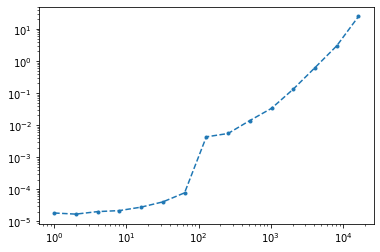

In [12]:
x=[2**i for i in range(15)]
plt.plot(x,times,marker='.', linestyle='--')
plt.xscale('log')
plt.yscale('log')

In [13]:
def curve(x,a,b,n):
    return a*x**n+b

In [14]:
fit(curve,x,times)[0][2] # wartość n

3.0288020204907897

Stąd wynika, że program ma złożoność czasową w przybliżeniu $O(n^3)$

Wynik odbiega od normy ponieważ był wykonywany w jupyterze w przeglądarce (chrome) przy włączonych innych kartach. Ten sam program uruchomiony w pythone:

```
import numpy as np
from scipy import linalg
from scipy.optimize import curve_fit as fit
import timeit
import random
import matplotlib.pyplot as plt
import time


def solve_n_time(n,a=-128,b=128,times=1):
    x=np.random.randint(a,b+1,n)
    A=np.random.randint(a,b+1,(n,n))
    b=[sum(x[i]*a[i] for i in range(n)) for a in A]
    
    return timeit.timeit("linalg.solve(A,b)","from scipy import linalg",number=times,globals=locals())


def curve(x,a,b,n):
    return a*x**n+b

def n(m=15,tim=1):
    
    times=np.zeros(m)
    for i in range(m):
        times[i]=solve_n_time(2**i,times=tim)/tim
        
    return fit(curve,[2**i for i in range(m)], times)[0][2] # = 2.77 za pierwszym, 2.24 za drugim
```

In [15]:
n(15,10) # wykonuje 10 razy dla macierzy kwadratowej stopnia 2^i dal i in [0,15)

2.8458927183944516

Ten sam program przy daje inne (bliższe prawdziwych) wyniki, jeśli nie jest wykonywany w jupyterze (Ale dla większych macierzy, czyli większego zużycia procesora, procesor automatycznie się podkręca, psując liniowość)

Dlatego powyższy wykres różni się od stanu rzeczywistego

# Zadanie 2

## Z poprzedniej listy
Implementacja stosu (delikatnie zmodyfikowanego, funckja peek)

In [16]:
import numpy as np

class Node:
    
    def __repr__(self):
        return str(self.data)
    
    def __init__(self,init_data):
        self.data = init_data
        self.next = None
  
    def get_data(self):
        return self.data

    def get_next(self):
        return self.next
  
    def set_data(self,new_data):
        self.data = new_data
  
    def set_next(self,new_next):
        self.next = new_next
    

class UnorderedList(object):
  
    def __init__(self):
        self.head = None

    def is_empty(self):
        return self.head == None

    def add(self, item):
        temp = Node(item)
        temp.set_next(self.head)
        self.head = temp

    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.get_next()
        return count
    
    def search(self,item):
        current = self.head
        found = False
        while current != None and not found:
            if current.get_data() == item:
                found = True
            else:
                current = current.get_next()
        return found
    
    def remove(self, item):
        current = self.head
        previous = None
        found = False

        while not found:
            if current.get_data() == item:
                found = True
            else:
                previous = current
                current = current.get_next()

        if previous == None: #jeśli usuwamy pierwszy element
            self.head = current.get_next()
        else:
            previous.set_next(current.get_next())

##################################################################################################################   
#                                               Uzupełnienie                                                     #
##################################################################################################################   
            
    def append(self, item):
        """
        Metoda dodająca element na koniec listy.
        Przyjmuje jako argument obiekt, który ma zostać dodany.
        Niczego nie zwraca.
        """
        if self.head:
            current=self.head
            while current:
                previous=current
                current=current.get_next()
            previous.set_next(Node(item))
        else:
            self.add(item)
        
    
    def index(self, item):
        """
        Metoda podaje miejsce na liście, 
        na którym znajduje się określony element - 
        element pod self.head ma indeks 0.
        Przyjmuje jako argument element, 
        którego pozycja ma zostać określona.
        Zwraca pozycję elementu na liście lub None w przypadku, 
        gdy wskazanego elementu na liście nie ma.
        """
        current = self.head
        found = False
        i=0
        while current != None and not found:
            if current.get_data() == item:
                found = True
            else:
                current = current.get_next()
                i+=1
        return i if found else None
     
        
    def insert(self, pos, item):
        """
        Metoda umieszcza na wskazanej pozycji zadany element.
        Przyjmuje jako argumenty pozycję, 
        na której ma umiescić element oraz ten element.
        Niczego nie zwraca.
        Rzuca wyjątkiem IndexError w przypadku, 
        gdy nie jest możliwe umieszczenie elementu
        na zadanej pozycji (np. na 5. miejsce w 3-elementowej liście).
        """
        current = self.head
        previous=None
        while current != None and pos >0:
            pos-=1
            previous=current
            current=current.get_next()
            
        if pos == 0:
            if previous:
                if current:
                    previous.set_next(Node(item))
                    previous.get_next().set_next(current)
                else:
                    previous.set_next(Node(item))
            else:
                self.add(item)
        else:
            raise IndexError("Wyjście poza zakres")
                    
  
    def pop(self, pos=-1):
        """
        Metoda usuwa z listy element na zadaniej pozycji.
        Przyjmuje jako opcjonalny argument pozycję, 
        z której ma zostać usunięty element.
        Jeśli pozycja nie zostanie podana, 
        metoda usuwa (odłącza) ostatni element z listy. 
        Zwraca wartość usuniętego elementu.
        Rzuca wyjątkiem IndexError w przypadku,
        gdy usunięcie elementu z danej pozycji jest niemożliwe.
        """
        n=self.size()
        if pos + 1 > n or -pos > n:
            raise IndexError("Wyjście poza zekres")
        
        if pos > 0:
            i = pos
        elif pos == 0:
            temp=self.head
            self.head=self.head.get_next()
            return temp.get_data()
        else:
            i = n + pos
            
        if i==0:
            temp=self.head
            self.head=self.head.get_next()
            return temp.get_data()
            
        current = self.head
        for _ in range(i-1):
            current = current.get_next()
        temp=current.get_next()
        current.set_next(current.get_next().get_next())
        return temp.get_data()
    
    
##################################################################################################################   
#                                               Dodatkowe                                                        #
##################################################################################################################   
            
    def __repr__(self):
        current=self.head
        tab=[]
        while current:
            tab.append(current.get_data())
            current=current.get_next()
        return str(tab)
    
    def reverse(self):
        """
        Metoda odwraca kolejność elementów w liście
        """
        temp=[]
        current=self.head
        while current:
            temp.append(current)
            current=current.get_next()
                    
        current=temp.pop()
        current.set_next(temp.pop())
        self.head=current
        
        
        while temp:
            current=current.get_next()
            current.set_next(temp.pop())
        current. get_next().set_next(None)
        
    def count(self, item):
        """
        Metoda zwraca liczbę danego elementu z listy
        """
        i=0
        current=self.head
        while current:
            i += 1 if current.get_data()==item else 0
            current = current.get_next()
        return i
            
    def shuffle(self):
        """
        Metoda permutuje listę
        """
        temp=[]
        current=self.head
        while current:
            temp.append(current)
            current=current.get_next()
            
        temp = [i for i in np.random.permutation(temp)]
                    
        current=temp.pop()
        current.set_next(temp.pop())
        self.head=current
        
        while temp:
            current=current.get_next()
            current.set_next(temp.pop())
        current.get_next().set_next(None)
        
    def __eq__(self, other):
        
        if type(other) == UnorderedList:
            current_self = self.head
            current_other = other.head
            
            while current_self and current_other:
                if current_self.get_data() != current_other.get_data():
                    return False
                current_self = current_self.get_next()
                current_other = current_other.get_next()
            if current_self or current_other:
                return False
            return True
        raise TypeError("'==' not supported between instances of 'UnorderedList' and '"+str(type(other).__name__)+"'")
            

    def same_element(self,other):
        """
        Sprawdza, czy kolejki mają takie same elementy (i ich liczbę)
        """
        temp_self = []
        temp_other = []
        current=self.head
        while current:
            temp_self.append(current.get_data())
            current = current.get_next()
            
        current=other.head
        while current:
            temp_other.append(current.get_data())
            current = current.get_next()
            
        while temp_self and temp_other:
            temp = temp_self.pop()
            for i in range(len(temp_other)):
                if temp==temp_other[i]:
                    temp_other.pop(i)
                    break
            else:
                return False
        return False if temp_self or temp_other else True
        
    def same_type_of_elements(self, other):
        """
        Sprawdza, czy wszystkie elementy jednego są w drugim
        """
        temp_self = []
        temp_other = []
        current=self.head
        while current:
            temp_self.append(current.get_data())
            current = current.get_next()
            
        current=other.head
        while current:
            temp_other.append(current.get_data())
            current = current.get_next()
            
        return all(i in temp_self for i in temp_other) and all(i in temp_other for i in temp_self)
    
    def __getitem__(self, pos):
        n=self.size()
        
        if pos + 1 > n or -pos > n:
            raise IndexError("Wyjście poza zekres")
            
        if pos > 0:
            i = pos
        elif pos == 0:
            return self.head.get_data()
        else:
            pos = n + pos
        
        current=self.head
        while current and pos > 0:
            current = current.get_next()
            pos-=1
        
        return current.get_data()
    
    def __contein__(self, item):
        return self.search(item)

    def __len__(self):
        return self.size()

In [17]:
class StackUsingUL(object):
    def __init__(self):
        self.item = UnorderedList()
    
    def is_empty(self):
        """
        Metoda sprawdzajacą, czy stos jest pusty.
        Nie pobiera argumentów.
        Zwraca True lub False.
        """
        return self.item.is_empty()
  
    def push(self, item):
        """
        Metoda umieszcza nowy element na stosie.
        Pobiera element, który ma zostać umieszczony.
        Niczego nie zwraca.
        """
        self.item.append(item)
    
    def pop(self):
        """
        Metoda ściąga element ze stosu.
        Nie przyjmuje żadnych argumentów.
        Zwraca ściągnięty element.
        Jeśli stos jest pusty, rzuca wyjątkiem IndexError.
        """

        return self.item.pop()

    def peek(self):
        """
        Metoda podaje wartość elementu na wierzchu stosu
        nie ściągajac go.
        Nie pobiera argumentów.
        Zwraca wierzchni element stosu.
        Jeśli stos jest pusty, rzuca wyjątkiem IndexError.
        """
        return self.item[-1] if self.size()>0 else float('inf') # Zmodyfikowane, jeśli nic nie ma na kijku to jest na nim cała podstawa, która w porównaniu z krążkami jest nieskończona

    def size(self):
        """
        Metoda zwraca liczę elementów na stosie.
        Nie pobiera argumentów.
        Zwraca liczbę elementów na stosie.
        """
        return self.item.size()
    

In [18]:
from numpy import base_repr

def Hanoi(n:int,sticks:tuple=(1,2),only_one:bool=False):
    """Algorytm krok po kroku rozwiązujący problem Wieży Hanoi
        n - liczba krążków
        sticks - dwuelementowa krotka z różnymi liczbami ze zbioru {1,2,3} oznaczająca z którego słupka na który chcemy przełożyć krążki
        only_one - jeśli prawda to krążek można przełożyć jedynie na krążek słupek obok (nie można przykładowo A->C), ale wykonywane iteracyjnie"""
        
    if type(n) is not int or type(sticks) is not tuple:
        raise ValueError("Niepoprawne dane wejściowe")
    
    if len(sticks)!=2 or  sticks[0] not in (1,2,3) or sticks[1] not in (1,2,3):
        raise ValueError("Złe dane wejściowe")
    
    if sticks[0]==sticks[1]:
        print("Wieża ułożona!")
        return None
    
    if n == 0:
        print("Wieża jest ułożona")
        return None
    if n < 0:
        raise ValueError("Liczba krążków musi być liczbą naturalną")
        
    last=6//(sticks[1]*sticks[0]) # numer ostatniego krążka
    Stick=[StackUsingUL(),StackUsingUL(),StackUsingUL()]
    for i in range(n):
        Stick[sticks[0]-1].push(n-i)
    
    if only_one:
        prev=n*"0"
        
        if sticks[0]!=2:
            start=1
            if sticks[1]==2:
                ends=3**n//2+1
            else:
                ends=3**n
        else:
            start=3**n//2+1
            ends=3**n
            right=True
            if sticks[1]==1:
                right=False

        
        for i in range(start,ends):
            nxt=(n-len(base_repr(i,base=3)))*"0"+str(base_repr(i,base=3))
            size=1

            while int(nxt[-size])-int(prev[-size])!=1:
                size+=1

            if size==Stick[0].peek():
                print("Przenieś klocek o rozmiarze",size,"z palika 1 na palik 2")
                Stick[1].push(Stick[0].pop())
                right=True
                #print(Stick[0].peek())

            elif size==Stick[2].peek():
                print("Przenieś klocek o rozmiarze",size,"z palika 3 na palik 2")
                Stick[1].push(Stick[2].pop())
                right=False
                #print(2)

            elif right and Stick[1].peek()<Stick[2].peek():
                print("Przenieś klocek o rozmiarze",size,"z palika 2 na palik 3")
                Stick[2].push(Stick[1].pop())
                #print(3)
            elif not right and Stick[1].peek()<Stick[0].peek():
                print("Przenieś klocek o rozmiarze",size,"z palika 2 na palik 1")
                Stick[0].push(Stick[1].pop())
                #print(4)
            elif Stick[1].peek()<Stick[2].peek():
                print("Przenieś klocek o rozmiarze",size,"z palika 2 na palik 3")
                Stick[2].push(Stick[1].pop())
            else:
                print("Przenieś klocek o rozmiarze",size,"z palika 2 na palik 1")
                Stick[0].push(Stick[1].pop())

            prev=nxt

        

    else:
        def hanoi(n,A,B,C,order):
            if n>0:
                hanoi(n-1,A,C,B,(order[0],order[2],order[1]))
                print("Przenieś klocek o rozmiarze",A.peek(),"z palika",order[0],"na palik", order[2])
                C.push(A.pop())
                hanoi(n-1,B,A,C,(order[1],order[0],order[2]))
            
        hanoi(n,Stick[sticks[0]-1],Stick[sticks[1]-1],Stick[last-1],(sticks[0],sticks[1],last))
    print("Wieża ułożona!")
    return None

In [19]:
Hanoi(3,(1,3))

Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Przenieś klocek o rozmiarze 2 z palika 1 na palik 3
Przenieś klocek o rozmiarze 1 z palika 2 na palik 3
Przenieś klocek o rozmiarze 3 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 3 na palik 1
Przenieś klocek o rozmiarze 2 z palika 3 na palik 2
Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Wieża ułożona!


In [20]:
Hanoi(3)

Przenieś klocek o rozmiarze 1 z palika 1 na palik 3
Przenieś klocek o rozmiarze 2 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 3 na palik 2
Przenieś klocek o rozmiarze 3 z palika 1 na palik 3
Przenieś klocek o rozmiarze 1 z palika 2 na palik 1
Przenieś klocek o rozmiarze 2 z palika 2 na palik 3
Przenieś klocek o rozmiarze 1 z palika 1 na palik 3
Wieża ułożona!


In [21]:
Hanoi(3,(2,1))

Przenieś klocek o rozmiarze 1 z palika 2 na palik 3
Przenieś klocek o rozmiarze 2 z palika 2 na palik 1
Przenieś klocek o rozmiarze 1 z palika 3 na palik 1
Przenieś klocek o rozmiarze 3 z palika 2 na palik 3
Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Przenieś klocek o rozmiarze 2 z palika 1 na palik 3
Przenieś klocek o rozmiarze 1 z palika 2 na palik 3
Wieża ułożona!


In [22]:
Hanoi(2,(1,3),True)

Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 3
Przenieś klocek o rozmiarze 2 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 3 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 1
Przenieś klocek o rozmiarze 2 z palika 2 na palik 3
Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 3
Wieża ułożona!


In [23]:
Hanoi(3,(1,2),True)

Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 3
Przenieś klocek o rozmiarze 2 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 3 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 1
Przenieś klocek o rozmiarze 2 z palika 2 na palik 3
Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 3
Przenieś klocek o rozmiarze 3 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 3 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 1
Przenieś klocek o rozmiarze 2 z palika 3 na palik 2
Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Wieża ułożona!


In [24]:
Hanoi(3,(3,2),True)

Przenieś klocek o rozmiarze 1 z palika 3 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 1
Przenieś klocek o rozmiarze 2 z palika 3 na palik 2
Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 3
Przenieś klocek o rozmiarze 2 z palika 2 na palik 1
Przenieś klocek o rozmiarze 1 z palika 3 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 1
Przenieś klocek o rozmiarze 3 z palika 3 na palik 2
Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 3
Przenieś klocek o rozmiarze 2 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 3 na palik 2
Wieża ułożona!


In [25]:
Hanoi(3,(2,3),True)

Przenieś klocek o rozmiarze 2 z palika 2 na palik 3
Przenieś klocek o rozmiarze 2 z palika 2 na palik 1
Przenieś klocek o rozmiarze 1 z palika 3 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 1
Przenieś klocek o rozmiarze 3 z palika 2 na palik 3
Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 3
Przenieś klocek o rozmiarze 2 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 3 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 1
Przenieś klocek o rozmiarze 2 z palika 2 na palik 3
Przenieś klocek o rozmiarze 1 z palika 1 na palik 2
Przenieś klocek o rozmiarze 1 z palika 2 na palik 3
Wieża ułożona!


# Zadanie 3 i 4

In [26]:
import turtle as tr

In [27]:
def koch(n, size, first = False):
    """
    n - stopień płatka kocha
    size - wielkość całego płatka
    first - czy zostało wykonane przy uruchamianiu
    """
    if (first):
        tr.speed(5*(4/3)**n) # przyśpiesza dla duzych n by wszystkie krzywe wykonywał w tym samym czasie (ale i tak jest ograniczenie procesora)
        tr.clear()
        tr.penup()
        tr.goto(-size/2,size/2)
        tr.pendown()
        koch(n, size);
        tr.left(-120);
        koch(n, size);
        tr.left(-120);
        koch(n, size);
        tr.left(-120);
    else:
        if (n > 0) :
            koch(n - 1, size / 3);
            tr.left(60);
            koch(n - 1, size / 3);
            tr.left(-120);
            koch(n - 1, size / 3);
            tr.left(60);
            koch(n - 1, size / 3);
        else:
            tr.forward(size);
        
    return False;

In [30]:
koch(0,400,True)

False

In [32]:
koch(4,400,True)

False

In [33]:
def hilbert(n,size,angle=90,first=False):
    """
    n - stopień krzywej
    size - wielkość krzywej
    first - czy zostało wykonane przy uruchamianiu
    """
    if first:
        tr.goto(-size/2,-size/2)
        tr.clear()
        tr.left(-tr.heading()+90)
        size=size/(2**n-1)
    if n >0:
        tr.right(angle)
        hilbert(n-1,size,-angle)
        tr.forward(size)
        tr.left(angle)
        hilbert(n-1,size,angle)
        tr.forward(size)
        hilbert(n-1,size,angle)
        tr.left(angle)
        tr.forward(size)
        hilbert(n-1,size,-angle)
        tr.right(angle)
    

In [35]:
hilbert(5,400,90,True)

Im większy stopień (dłóższa krzywa), tym szybciej się porusza, by za każdym razem kończył w tym samym momencie (dla wyższych stopni ograniczeniem jest procesor)